In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [16]:
# Load data

df = pd.read_csv('./Iris.csv')
df["Species"]=df["Species"].astype('category').cat.codes
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    int8   
dtypes: float64(4), int64(1), int8(1)
memory usage: 6.1 KB


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5
Species,150.0,1.000000,0.819232,0.0,0.00,1.00,2.00,2.0


<Axes: xlabel='Species', ylabel='count'>

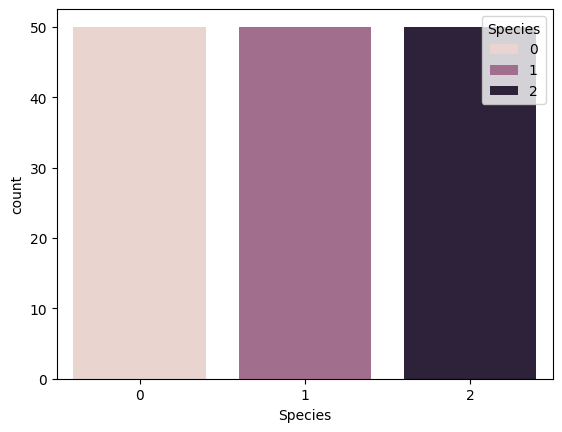

In [19]:
# Perform EDA on Data

sns.countplot(df, x='Species', hue='Species')
# Data is Equally Distributed

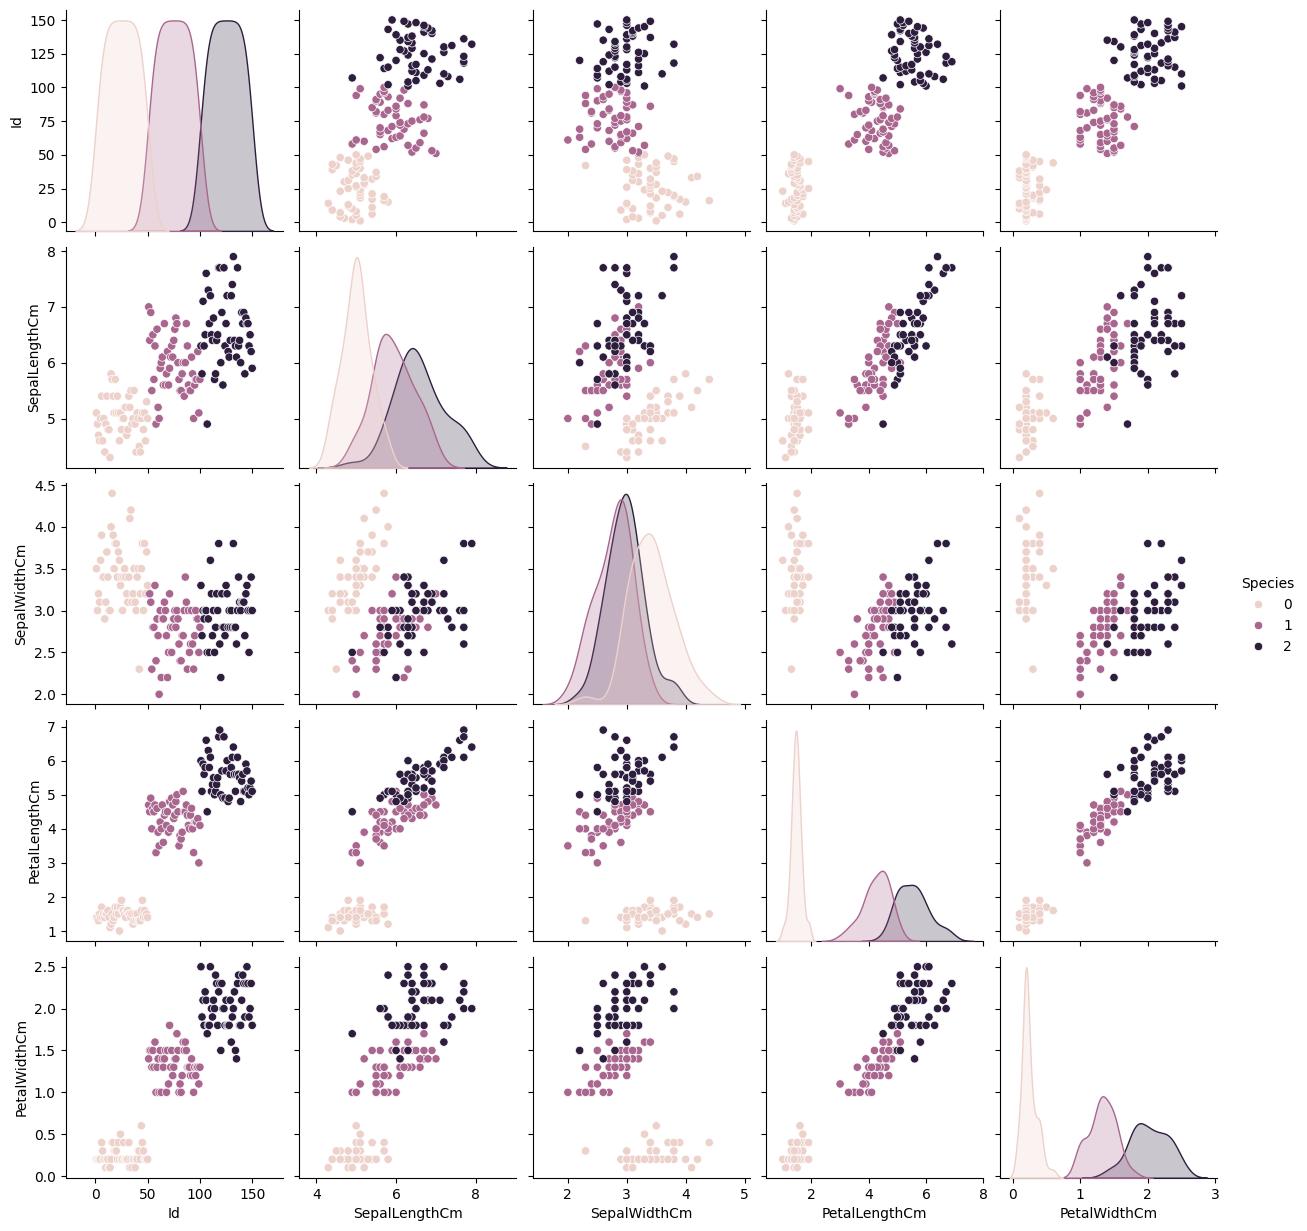

In [20]:
sns.pairplot(df, hue='Species')
# There are various distinguishing factors present within the data for each species 

In [25]:
# Making individual category based dataframes
df_1 = df.copy()
df_1[df['Species']!=0] = 0
df_1[df['Species']==0] = 1

X_1 = df_1.drop(['Id', 'Species'], axis=1)
y_1 = df_1['Species']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

svm_1 = SVC(gamma='auto', probability=True)
svm_1.fit(X_train, y_train)
y_pred = svm_1.predict(X_test)
print('SVM 1')
print(classification_report(y_test, y_pred, target_names=["setosa", 'other']))

SVM 1
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        20
       other       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [27]:
df_2 = df.copy()
df_2[df['Species']!=1] = 0
df_2[df['Species']==1] = 1

X_2 = df_2.drop(['Id', 'Species'], axis=1)
y_2 = df_2['Species']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

svm_2 = SVC(gamma='auto', probability=True)
svm_2.fit(X_train, y_train)
y_pred = svm_2.predict(X_test)
print('SVM 2')
print(classification_report(y_test, y_pred, target_names=["versicolor", 'other']))

SVM 2
              precision    recall  f1-score   support

  versicolor       1.00      1.00      1.00        21
       other       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [30]:
df_3 = df.copy()
df_3[df['Species']!=2] = 0
df_3[df['Species']==2] = 1

X_3 = df_3.drop(['Id', 'Species'], axis=1)
y_3 = df_3['Species']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_3, y_3, test_size=0.2, random_state=42)

svm_3 = SVC(gamma='auto', probability=True)
svm_3.fit(X_train, y_train)
y_pred = svm_3.predict(X_test)
print('SVM 3')
print(classification_report(y_test, y_pred, target_names=["virginica", 'other']))

SVM 3
              precision    recall  f1-score   support

   virginica       1.00      1.00      1.00        19
       other       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [32]:
# Combining all SVMs
svcs=[svm_1, svm_2, svm_3]
X = df.drop('Species', axis=1)
y = df['Species']

In [36]:
final=[]
final.append(svm_1.predict(X_1))
final.append(svm_2.predict(X_2))
final.append(svm_3.predict(X_3))

final

finalSVMPred=[max(range(len(svcs)), key=lambda i: classifier[i]) for classifier in zip(*final)]
print('SVC Combined')
print(classification_report(y, finalSVMPred))

SVC Combined
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

